# How are in-demand skills Trending for Data Analysts

## Mythology 

1. Aggregate skills count monthly.
2. Re-analyze based on percentage of total jobs.
3. Plot the monthly skill demand.


In [1]:
# Importing Libraries
import ast
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst')& (df['job_country'] == 'United States')].copy()

In [10]:
df_DA_US['job_posted_month_no'] = df['job_posted_date'].dt.month

In [12]:
df_DA_US_explode = df_DA_US.explode('job_skills')

In [21]:
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_US_pivot = df_DA_US_pivot.drop('Total')

df_DA_US_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,1,0,0,0,0,0,0,0,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,0,0,0,0,0,0,0,0,0,1
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,0,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,1,0,0,0,0
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,0,0,1,0,0,1,1,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [23]:
DA_totals = df_DA_US.groupby('job_posted_month_no').size()

In [25]:
df_DA_US_percent = df_DA_US_pivot.div(DA_totals/100, axis=0)

In [26]:
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')

df_DA_US_percent

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,14.161716,11.056050,7.657977,6.937733,5.638832,4.656961,4.115239,2.979470,2.991782,2.209979,...,0.003078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,13.657527,11.152785,7.225384,6.975341,5.225039,4.505087,4.837041,3.181583,3.039317,2.215899,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,13.862748,11.434833,7.752138,7.232177,5.319926,4.903098,4.529242,3.162735,2.874823,1.796227,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004297
Apr,13.813221,10.934752,7.674488,7.202608,5.585346,4.452833,4.534340,2.981425,2.788383,1.883231,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,13.726533,11.264160,7.615806,7.174387,5.169388,4.610966,4.573738,2.962293,2.738925,1.903951,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.005318,0.000000,0.000000,0.000000,0.000000
Jun,13.362592,11.121487,7.601083,7.512373,4.594267,4.748343,4.617611,3.366327,2.913437,1.932954,...,0.000000,0.000000,0.000000,0.004669,0.000000,0.000000,0.004669,0.004669,0.000000,0.000000
Jul,13.267901,10.770952,7.795972,7.312856,5.065094,4.480269,4.480269,2.985151,2.791904,2.039260,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,13.325007,10.659225,7.614847,7.903673,4.980290,4.960774,4.714882,2.935092,2.911674,1.889075,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,13.122534,10.297902,7.736291,7.027274,4.894505,4.265538,4.688661,2.733147,2.715993,2.052719,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


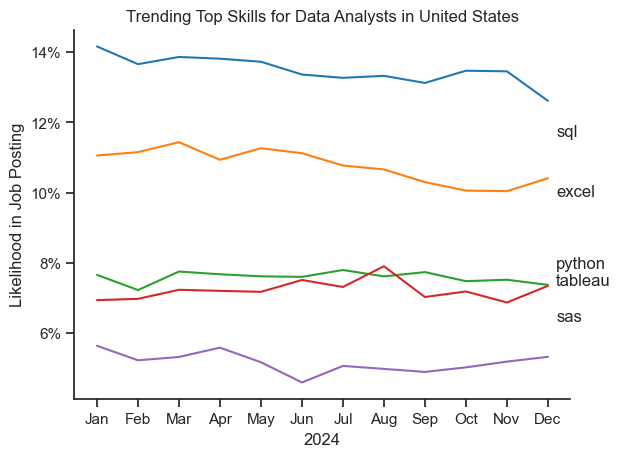

In [57]:
df_plot = df_DA_US_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in United States')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2024')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

# for i in range(5):
#     plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

for i, col in enumerate(df_plot.columns):
    plt.text(11.2, df_plot.iloc[-1, i] + 0.5 * (i - 2), col)
